In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from matplotlib import pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)

In [8]:
pf = pd.read_csv('../data/kms_tables/평형정보.csv', sep="|", low_memory=False)
df = pd.read_csv('../data/kms_new/단지기본정보.csv', sep='|', low_memory=False)

## 평형정보 테이블 검증

In [16]:
# 평형정보 없는 단지는 없는걸로 확인
not_in_list = []
for cod in df['단지코드']:
    if cod not in pf['단지코드']: 
        not_in_list.append(cod)
        
len(not_in_list)

0

In [18]:
pf.columns

Index(['Unnamed: 0', '단지코드', '평형코드', '평타입', '사용여부', '방수', '욕실수', '계약면적_제곱미터',
       '공급면적_제곱미터', '전용면적_제곱미터', '공용면적_제곱미터', '주차장면적_제곱미터', '서비스면적_제곱미터',
       '기타면적_제곱미터', '대지면적', '대지지분', '평형별총세대수', '단층복층구분', '기본평면도', '확장평면도',
       '분양가', '평당분양가', '융자금액', '상환조건', '융자종류', '분양권전매제한여부', '전매제한년수', '전매가능일자',
       '관리비', '전용율', '등록일자', '수정일자', '삭제일자', '계약가능시작일자', '처리요청구분자', '요청일자',
       '처리일자'],
      dtype='object')

In [26]:
# 평형코드 이거 기준이 뭔지... 그게 안적혀있네.. 
pf['평형코드'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  26,
        27,  41,  53,  54,  42,  43,  44,  45,  46,  47,  49,  50,  48,
        51,  52,  55,  56,  57,  58,  59,  60,  61,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  62,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [49]:
# 공급면적 제곱미터를 평으로 고쳐보면... 2862평? 아파트가? ... 2평이랑 3평은 뭐냐 ...
pf['공급면적_평'] = (pf['공급면적_제곱미터'] / 3.305785)
pf['공급면적_평'].unique()

array([30.99717616, 42.6373766 , 53.05245199, ..., 28.90671958,
       28.95847734, 22.50660584])

In [55]:
pf['공급면적_평'].max()

2861.5759948090995

In [65]:
pf[pf['공급면적_평'] > 300]

,Unnamed: 0,단지코드,평형코드,평타입,사용여부,방수,욕실수,계약면적_제곱미터,공급면적_제곱미터,전용면적_제곱미터,...,관리비,전용율,등록일자,수정일자,삭제일자,계약가능시작일자,처리요청구분자,요청일자,처리일자,공급면적_평
65755,65755,18257,35,NaN,Y,4,2,1829.1120,1201.202,809.1330,...,0,NaN,2009-10-28 16:53:52,2021-02-19 19:13:55,1900-01-01 00:00:00,NaN,Y,NaN,NaN,363.363619
113054,113054,32405,1,NaN,Y,4,2,1667.3380,1242.478,1029.3200,...,0,NaN,2011-10-26 16:38:57,2016-08-02 17:26:20,1900-01-01 00:00:00,NaN,Y,NaN,NaN,375.849609
174380,174380,46794,152,NaN,Y,5,3,2014.3600,1300.560,795.0400,...,0,NaN,2017-10-24 15:18:21,2017-10-24 15:18:21,1900-01-01 00:00:00,NaN,Y,NaN,NaN,393.419415
174381,174381,46794,153,NaN,Y,5,3,2130.8000,1354.150,829.4100,...,0,NaN,2017-10-24 15:18:21,2017-10-24 15:18:21,1900-01-01 00:00:00,NaN,Y,NaN,NaN,409.630390
198185,198185,52589,9,NaN,Y,1,1,9463.7208,9459.755,20.1502,...,0,NaN,2019-02-07 11:38:12,2019-02-07 11:38:12,1900-01-01 00:00:00,NaN,Y,NaN,NaN,2861.575995
215553,215553,56831,10,NaN,Y,5,4,1319.3800,1168.210,488.1800,...,0,NaN,2020-02-10 09:27:17,2020-02-10 09:27:17,1900-01-01 00:00:00,NaN,Y,NaN,NaN,353.383538


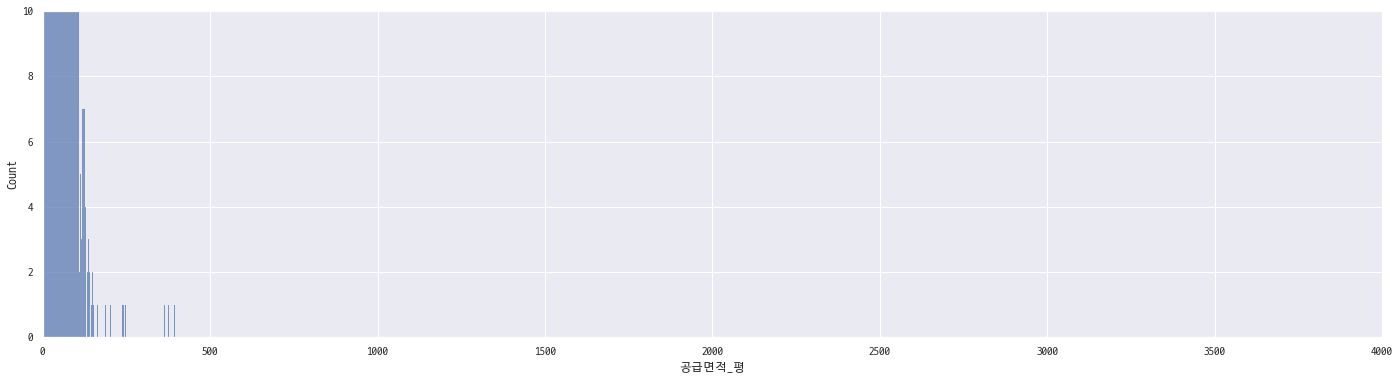

In [54]:
sns.set(rc={'figure.figsize': (24, 6), 'font.family': 'D2Coding'})
p = sns.histplot(pf['공급면적_평'], bins=4000)
p.set_xlim(0, 4000)
p.set_ylim(0, 10)
plt.show()

In [66]:
# 가장 큰 아파트 인데, 부산에 있는 조그만 아파트인데 값 잘못 들어간듯 함.
df[df['단지코드'] == 52589]['단지구역명']

43622    대상하이츠
Name: 단지구역명, dtype: object

In [60]:
# 평타입도 진짜 여러가지 이상한 값 있어서 쓰기 어려울 듯함.
pf['평타입'].unique()

array([nan, 'B', 'C', ..., 'O03', 'O04', 'O05'], dtype=object)

In [76]:
# 평형 정보가 아파트 단지당 여러개 있어서 이거는 json document 형태로 넣어야 할듯함. -> 다른 평형을 그냥 다른 아파트로 취급하면 어떨까
pf.groupby('평당분양가').count()

,Unnamed: 0,단지코드,평형코드,평타입,사용여부,방수,욕실수,계약면적_제곱미터,공급면적_제곱미터,전용면적_제곱미터,...,관리비,전용율,등록일자,수정일자,삭제일자,계약가능시작일자,처리요청구분자,요청일자,처리일자,공급면적_평
평당분양가,,,,,,,,,,,,,,,,,,,,,


In [ ]:
pf[['방수', '욕실수', '전용면적_제곱미터', '전용면적_평']]

## 관리비정보테이블 검증

In [2]:
ff = pd.read_csv('../data/kms_tables/아파트관리비정보.csv', sep='|', low_memory=False)

In [8]:
# 관리비 데이터 너무 커, 왜냐면 2014년부터 전부 모아놔서... 일단 2019년부터로 돌리고 없는 데이터는 다시 찾아오는 식으로 해야할듯함.
len(ff)

5489744

In [7]:
ff['관리비년월'].unique()

array([201401, 201402, 201403, 201404, 201405, 201406, 201407, 201408,
       201409, 201410, 201411, 201412, 201501, 201502, 201503, 201504,
       201505, 201506, 201507, 201508, 201509, 201510, 201511, 201512,
       201601, 201602, 201603, 201604, 201605, 201606, 201607, 201608,
       201609, 201610, 201611, 201612, 201701, 201702, 201703, 201704,
       201705, 201706, 201707, 201708, 201709, 201710, 201711, 201712,
       201801, 201802, 201803, 201804, 201805, 201806, 201807, 201808,
       201809, 201810, 201811, 201812, 201901, 201902, 201903, 201904,
       201905, 201906, 201907, 201908, 201909, 201910, 201911, 201912,
       202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008,
       202009, 202010, 202011, 202012, 202101, 202102, 202103, 202104,
       202105, 202106, 202107, 202108, 202109, 202110, 202111, 201312])

In [5]:
ff.columns

Index(['Unnamed: 0', '단지코드', '평형코드', '관리비년월', '공용관리비', '일반관리비', '인건비', '급여',
       '제수당', '상여금', '퇴직금', '산재보험료', '고용보험료', '국민연금', '건강보험료', '식대등복리후생비',
       '제사무비', '일반사무용품비', '도서인쇄비', '여비교통비', '제세공과금', '공과금중전기료', '통신료', '우편료',
       '제세공과금등', '피복비', '교육훈련비', '차량유지비', '연료비', '수리비', '보험료', '기타차량유지비',
       '그밖의부대비용', '관리용품구입비', '전문가자문비등', '잡비', '청소비', '경비비', '소독비', '승강비유지비',
       '지능형홈네트워크설비유지비', '수선유지비', '수선비', '시설유지비', '안전점검비', '재해예방비', '위탁관리수수료',
       '개별사용료', '난방비', '난방공용', '난방전용', '급탕비', '급탕공용', '급탕전용', '가스사용료', '가스공용',
       '가스전용', '전기료', '전기공용', '전기전용', '수도료', '수도공용', '수도전용', '정화조오물수수료',
       '생활폐기물수수료', '입주자대표회의운영비', '건물보험료', '선거관리위원회운영비', '장기수선충당금', '월사용액',
       '충당금잔액', '적립요율', '합계', '사용여부', '처리요청구분자', '요청일자', '처리일자'],
      dtype='object')

In [12]:
ff.groupby('단지코드').count()

,Unnamed: 0,평형코드,관리비년월,공용관리비,일반관리비,인건비,급여,제수당,상여금,퇴직금,...,선거관리위원회운영비,장기수선충당금,월사용액,충당금잔액,적립요율,합계,사용여부,처리요청구분자,요청일자,처리일자
단지코드,,,,,,,,,,,,,,,,,,,,,
1,376,376,376,376,376,376,376,376,376,376,...,376,376,376,376,376,376,376,376,376,0
3,376,376,376,376,376,376,376,376,376,376,...,376,376,376,376,376,376,376,376,376,0
23,318,318,318,318,318,318,318,318,318,318,...,318,318,318,318,318,318,318,318,318,0
29,282,282,282,282,282,282,282,282,282,282,...,282,282,282,282,282,282,282,282,282,0
37,552,552,552,552,552,552,552,552,552,552,...,552,552,552,552,552,552,552,552,552,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221427,462,462,462,462,462,462,462,462,462,462,...,462,462,462,462,462,462,462,462,0,0
221506,528,528,528,528,528,528,528,528,528,528,...,528,528,528,528,528,528,528,528,0,0
221562,243,243,243,243,243,243,243,243,243,243,...,243,243,243,243,243,243,243,243,243,0


In [19]:
ff[ff['관리비년월'] >= 202001].groupby('단지코드')['합계'].mean()

단지코드
1         335730.613636
3         180097.363636
29        294711.727273
37        163465.939394
42        222392.488636
              ...      
221427    308994.103896
221506    308811.278409
221562    106277.539683
222225    223926.636364
223185    161608.194444
Name: 합계, Length: 14957, dtype: float64

In [13]:
ff.head()

,Unnamed: 0,단지코드,평형코드,관리비년월,공용관리비,일반관리비,인건비,급여,제수당,상여금,...,선거관리위원회운영비,장기수선충당금,월사용액,충당금잔액,적립요율,합계,사용여부,처리요청구분자,요청일자,처리일자
0,0,1,1,201401,93493,36919,29945,21896,1776,0,...,0,6131740,0,0,0.0,382475,Y,Y,2021-12-20 18:18:28,NaN
1,1,1,1,201402,91829,35071,29300,22290,1776,0,...,0,6131740,0,0,0.0,322584,Y,Y,2021-12-20 18:18:28,NaN
2,2,1,1,201403,91882,35569,29338,22348,1776,0,...,0,6131740,0,0,0.0,294557,Y,Y,2021-12-20 18:18:28,NaN
3,3,1,1,201404,92634,36063,29677,22348,1776,0,...,0,6131740,0,0,0.0,238239,Y,Y,2021-12-20 18:18:28,NaN
4,4,1,1,201405,92584,36098,30029,22675,1776,0,...,0,6131740,0,0,0.0,196735,Y,Y,2021-12-20 18:18:28,NaN


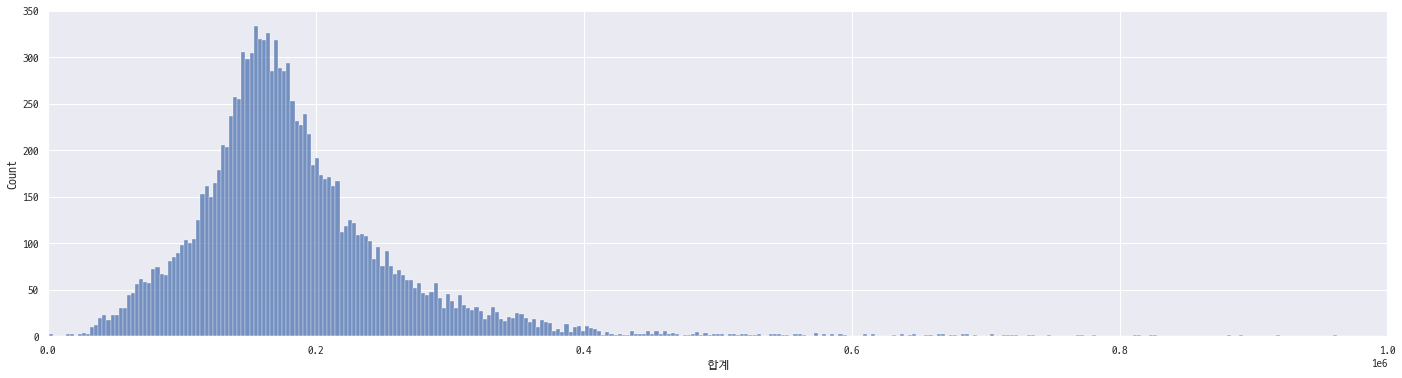

In [32]:
sns.set(rc={'figure.figsize': (24, 6), 'font.family': 'D2Coding'})
p = sns.histplot(ff[(ff['관리비년월'] <= 201901) & (ff['관리비년월'] >= 201801)].groupby('단지코드')['합계'].mean(), bins=400)
p.set_xlim(0, 1e6)
#plt.axvline(x=12, color='red')
plt.show()


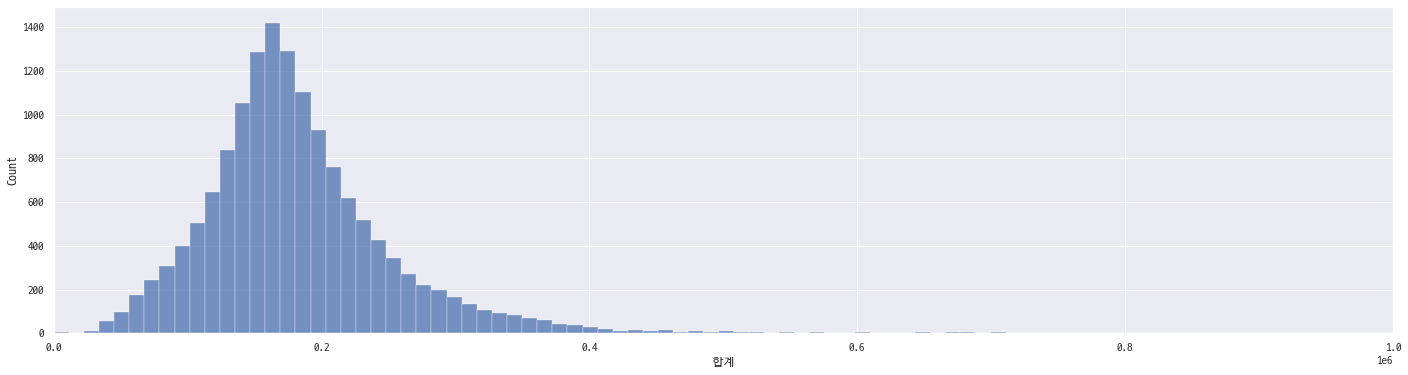

In [35]:
p = sns.histplot(ff[(ff['관리비년월'] <= 202001) & (ff['관리비년월'] >= 201901)].groupby('단지코드')['합계'].mean(), bins=400)
p.set_xlim(0, 1e6)
#plt.axvline(x=12, color='red')
plt.show()


In [36]:
target_ff = ff[(ff['관리비년월'] >= 202001)].groupby('단지코드')['합계'].mean()

In [37]:
len(target_ff)

14957

In [39]:
target_ff.index

Int64Index([     1,      3,     29,     37,     42,     43,     45,     49,
                61,     62,
            ...
            220098, 220589, 220634, 220977, 221193, 221427, 221506, 221562,
            222225, 223185],
           dtype='int64', name='단지코드', length=14957)

In [44]:
ff.groupby('단지코드').count().index

Int64Index([     1,      3,     23,     29,     37,     42,     43,     45,
                49,     61,
            ...
            220098, 220589, 220634, 220977, 221193, 221427, 221506, 221562,
            222225, 223185],
           dtype='int64', name='단지코드', length=15184)

In [42]:
idxs = []
for idx in ff.groupby('단지코드').count().index:
    if idx not in target_ff.index:
        idxs.append(idx)

In [56]:
last = ff.loc[idxs]
len(last)

227

In [57]:
last[last['관리비년월'] >= 202001].groupby('단지코드')['합계'].mean()

단지코드
1      298329.750000
3       80197.833333
29     456775.000000
37     193873.500000
42     160055.000000
45     208057.500000
61     220785.000000
62     260153.000000
102    433314.000000
118    343155.333333
132    308697.166667
134    360430.333333
185    402779.000000
186    249082.000000
190    411888.000000
196    427090.000000
233    745750.000000
234    641307.000000
243    413635.000000
253    326350.000000
Name: 합계, dtype: float64